<a href="https://colab.research.google.com/github/erberry/ThinkML/blob/main/orange_mixs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 安装依赖

In [ ]:
!pip install diffusers
!pip install transformers
!pip install safetensors
!pip install omegaconf
!pip install compel

### 加载模型

使用 OrangeMixs 模型，可以到 huggingface 上查询关于该模型的信息，包你收获满满。

safety_checker 可以阻止输出“令人不悦”的内容，关闭即可。

compel 是一个 embedding 的库，可以解决 diffusers 库最多只能支持77token的问题。

In [ ]:
from diffusers import StableDiffusionPipeline
from compel import Compel

pipe = StableDiffusionPipeline.from_single_file(
    "https://huggingface.co/WarriorMama777/OrangeMixs/blob/main/Models/AbyssOrangeMix3/AOM3A1_orangemixs.safetensors"
)
pipe.to("cuda")
pipe.safety_checker = None
pipe.requires_safety_checker = False


compel = Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder)

  0%|          | 0/50 [00:00<?, ?it/s]

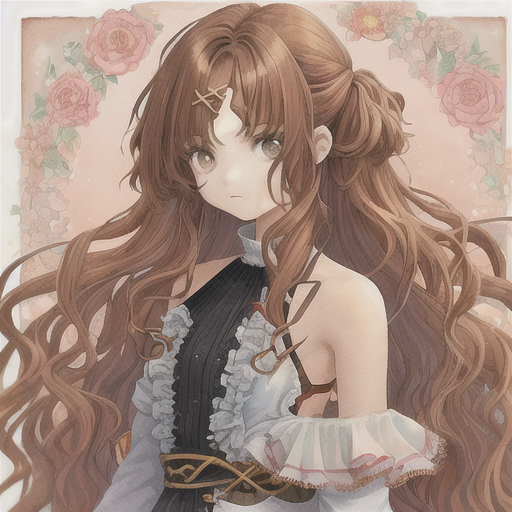

In [ ]:
prompt = """
1girl, solo, depicting in watercolor painting style, a youthful and vibrant girl (age: teenager), her hair is naturally flowing, color: chestnut brown, hairstyle: long wavy curls, hair length: slightly below shoulder, adorned with a colorful floral hairpin on the side, eye color: deep hazel, eye shape: almond-shaped, facial expression: serene with a hint of joy, breast size: average, clothing: she wears a flowy sky-blue sundress with a white lacy collar and delicate ruffles, pattern: subtle floral print, shoe: barefoot, standing gracefully on a grassy hillside, background: a picturesque countryside scene with rolling green hills, a crystal-clear river flowing nearby, and a cloudless blue sky with a few fluffy white clouds. The gentle breeze caresses her dress, causing it to sway gracefully. She extends her hands into the air, as if embracing the beauty of nature surrounding her.
"""
conditioning = compel.build_conditioning_tensor(prompt)
image = pipe(prompt_embeds=conditioning).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

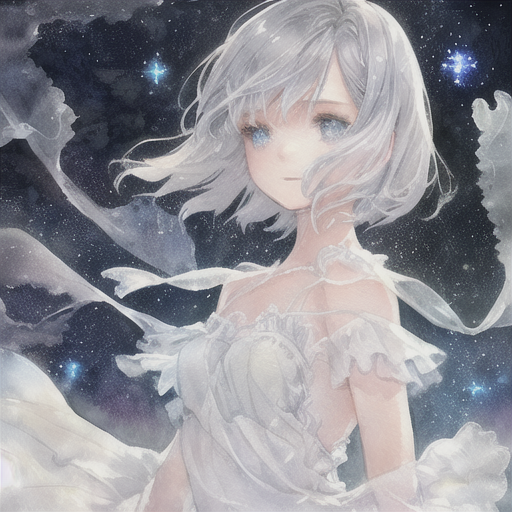

In [ ]:
prompt = """
1girl, solo, watercolor painting, ethereal style, short bob haircut, silver-gray hair color, wispy and layered, adorned with delicate stars, celestial blue eyes, round and innocent-shaped, gentle smile, petite frame, wearing a flowing white dress with iridescent sequins, floating weightlessly amidst a starry night sky. The background showcases the vastness of the cosmos, with clusters of galaxies, shooting stars, and a shining crescent moon.
"""
conditioning = compel.build_conditioning_tensor(prompt)
image = pipe(prompt_embeds=conditioning).images[0]
image

### 使用 OrangeMix2 模型

使用修剪（pruned）过的模型，可以占用更少内存（显存）。

nsfw 即"不适合在工作场所浏览的内容"。

with VAE 解决原模型颜色浅的问题。



In [ ]:
from diffusers import StableDiffusionPipeline
from compel import Compel

pipe = StableDiffusionPipeline.from_single_file(
    "https://huggingface.co/WarriorMama777/OrangeMixs/blob/main/Models/AbyssOrangeMix2/Pruned/AbyssOrangeMix2_nsfw_pruned_fp16_with_VAE.safetensors"
)
pipe.to("cuda")
pipe.safety_checker = None
pipe.requires_safety_checker = False


compel = Compel(tokenizer=pipe.tokenizer, text_encoder=pipe.text_encoder)

  0%|          | 0/50 [00:00<?, ?it/s]

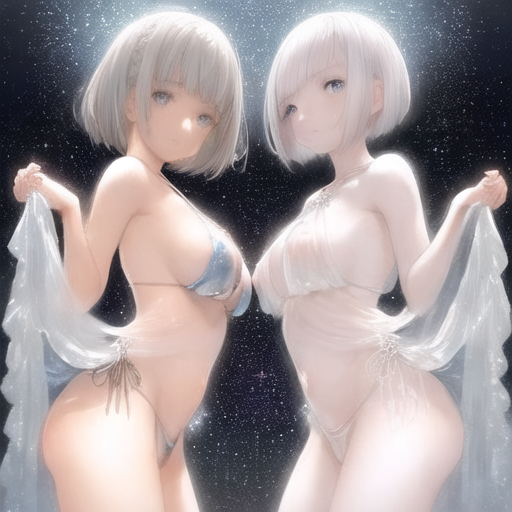

In [ ]:
prompt = """
2girls, bikini, breasts, standing, face each other, watercolor painting, ethereal style, short bob haircut, silver-gray hair color, wispy and layered, adorned with delicate stars, celestial blue eyes, round and innocent-shaped, gentle smile, petite frame, wearing a flowing white dress with iridescent sequins, floating weightlessly amidst a starry night sky. The background showcases the vastness of the cosmos, with clusters of galaxies, shooting stars, and a shining crescent moon.
"""
conditioning = compel.build_conditioning_tensor(prompt)
image = pipe(prompt_embeds=conditioning).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

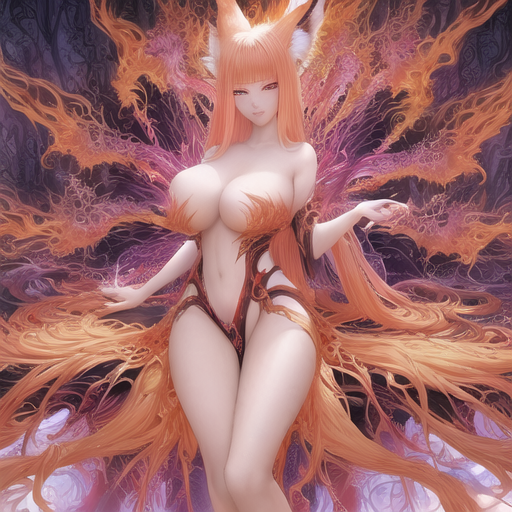

In [ ]:
prompt = """
In this breathtaking masterpiece, a hyper-realistic image comes to life, showcasing the ultimate nine-tailed fox girl—a radiant being of otherworldly beauty and power. The artwork embraces hyper maximalism, every inch of the composition bursting with intricate details that captivate the viewer's imagination. The nine-tailed fox girl stands gracefully amidst a mystical forest, her lithe form exuding an air of ethereal elegance. Her long, flowing locks cascade like molten gold, shimmering with an inner glow that hints at her celestial origins. Each strand is meticulously rendered, capturing the play of light as it dances across the silky strands. <lora:add_detail:1>
"""
conditioning = compel.build_conditioning_tensor(prompt)
image = pipe(prompt_embeds=conditioning).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

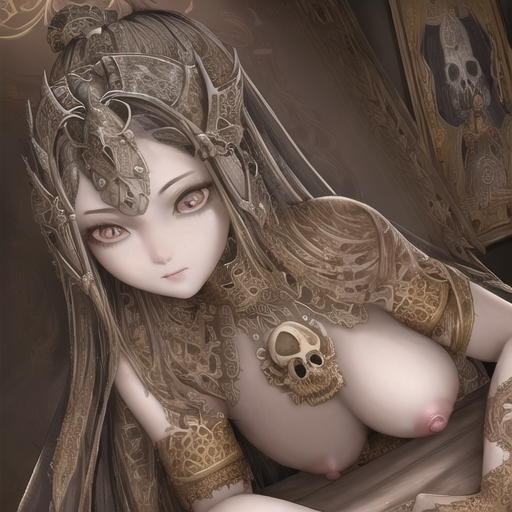

In [ ]:
prompt = """
{{unreal engine 5, religious painting, 100-layer, hyper-detailed, high resolution, textile shading, beautiful detailed eyes, 4k, 8k, 16k, stunning, sharp, smooth, realistic, intricate, overall detail}}, {{barbarian}}, nsfw, 1 cute girl, solo, {{tribal hairband, skull necklace, dark skin}}, navel, {{intricate tribal tattoo, tribal vest, tribal loincloth}}, {{holding knife, fighting stance}}, serious, glare face, younger, brown hair, short hair, yellow eyes, medium breasts, outdoor, {{primeval forest, sunlight filtering through trees, lens flare}}, facing the front, straight-on, cowboy shot, solo focus, perfect face, perfect anatomy, intricate, (highly detailed),
"""
conditioning = compel.build_conditioning_tensor(prompt)
neg_conditioning = compel.build_conditioning_tensor(neg_prompt)
image = pipe(prompt_embeds=conditioning).images[0]
image